In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
train_data_dir='/home/aryan/Train'
val_data_dir='/home/aryan/Val'

In [3]:
img_rows,img_cols=224,224
model=VGG16(weights ='imagenet',
       include_top=False,
       input_shape=(img_rows,img_cols,3))

In [4]:
for layer in model.layers:
    layer.trainable = False

In [5]:
folders = glob('/home/aryan/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
model=Model(inputs=model.input,outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 65,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 30,
                                            class_mode = 'categorical')

Found 3900 images belonging to 6 classes.
Found 879 images belonging to 6 classes.


In [11]:
"""class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True"""

NameError: name 'tf' is not defined

In [12]:

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
             metrics=['accuracy'])
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),

)

Epoch 1/5
60/60 [==============================] - 1307s 22s/step - loss: 0.9354 - accuracy: 0.7131 - val_loss: 0.0899 - val_accuracy: 0.9727
Epoch 2/5
60/60 [==============================] - 1301s 22s/step - loss: 0.0536 - accuracy: 0.9906 - val_loss: 0.0770 - val_accuracy: 0.9636
Epoch 3/5
60/60 [==============================] - 1342s 22s/step - loss: 0.0403 - accuracy: 0.9914 - val_loss: 0.0337 - val_accuracy: 0.9920
Epoch 4/5
60/60 [==============================] - 1289s 22s/step - loss: 0.0292 - accuracy: 0.9963 - val_loss: 0.0291 - val_accuracy: 0.9954
Epoch 5/5
60/60 [==============================] - 1287s 21s/step - loss: 0.0201 - accuracy: 0.9958 - val_loss: 0.0590 - val_accuracy: 0.9761


In [14]:
model.save('faceDetector.h5')

In [2]:
from keras.models import load_model
model=load_model('faceDetector.h5')

In [3]:
import cv2
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img,img_to_array

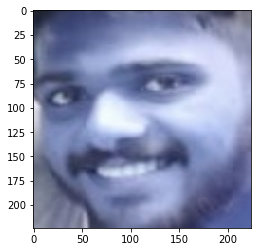

[[0.5641543  0.22402228 0.14131837 0.00443085 0.06480879 0.00126534]]
[0]


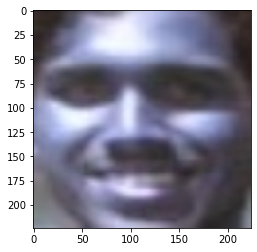

[[0.18965566 0.38806942 0.1745117  0.00374494 0.14606075 0.09795745]]
[1]


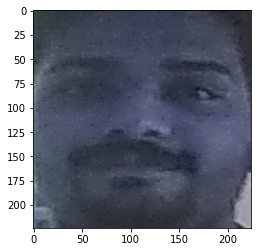

[[0.27844957 0.2864825  0.04610827 0.06126052 0.22286455 0.10483454]]
[1]


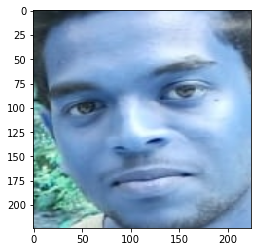

[[2.4714594e-04 6.2651098e-01 2.2019527e-03 9.7604707e-04 3.7001023e-01
  5.3634740e-05]]
[1]


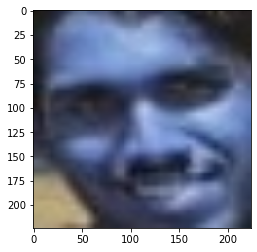

[[0.06769948 0.11511722 0.05297335 0.00229151 0.05927614 0.70264226]]
[5]


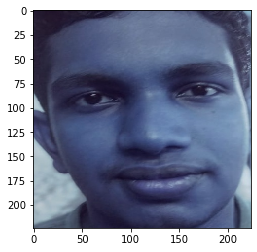

[[0.01374898 0.37070414 0.02845029 0.15141669 0.43463802 0.00104186]]
[4]


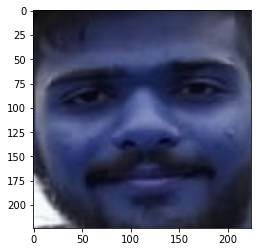

[[0.04489447 0.9275848  0.00931454 0.00905174 0.00683084 0.00232351]]
[1]


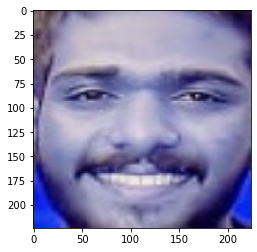

[[2.0160333e-03 8.2799017e-01 9.1478480e-03 1.6149442e-04 1.6047059e-01
  2.1384744e-04]]
[1]


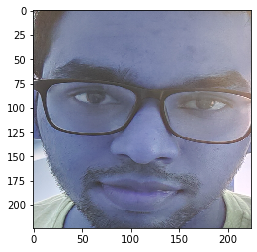

[[1.22458745e-08 9.43355076e-07 1.30187973e-01 8.69801641e-01
  9.44140356e-06 4.88238605e-08]]
[3]


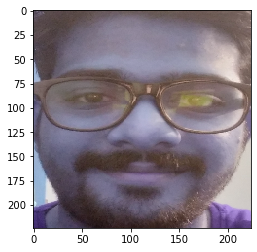

[[1.7777657e-08 3.3489516e-04 2.9954135e-01 7.0010614e-01 1.7289174e-05
  3.2168117e-07]]
[3]


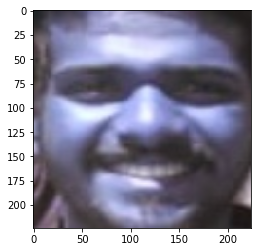

[[2.6747879e-02 5.9099698e-01 2.9302680e-01 3.3161126e-03 8.5537985e-02
  3.7417631e-04]]
[1]


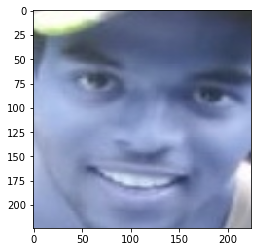

[[0.07409465 0.13137704 0.04044659 0.01587377 0.72736657 0.01084138]]
[4]


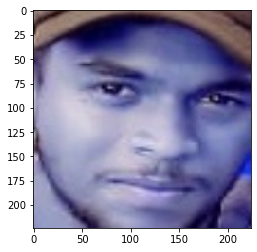

[[2.4950627e-02 7.4892586e-01 9.7060697e-03 1.9883262e-03 2.1386105e-01
  5.6804583e-04]]
[1]


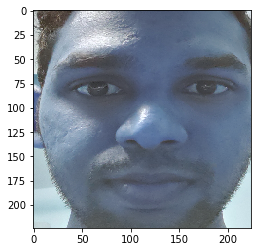

[[0.0585118  0.14308892 0.01128239 0.7668913  0.01901699 0.00120858]]
[3]


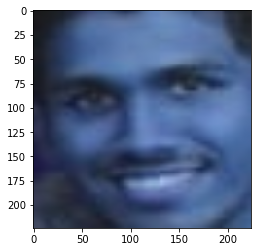

[[0.22795765 0.09200037 0.09252132 0.00911354 0.41653264 0.16187452]]
[4]


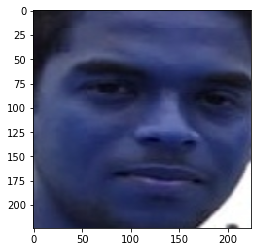

[[0.07604251 0.26075494 0.03869849 0.11429212 0.3940447  0.11616719]]
[4]


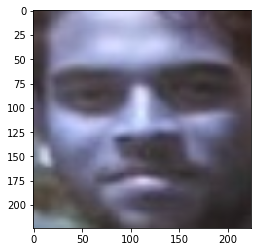

[[0.3205715  0.20870534 0.11613926 0.01238304 0.18014275 0.1620581 ]]
[0]


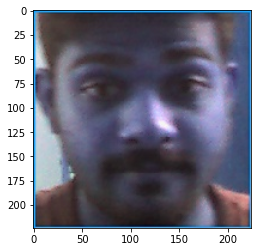

[[1.5115536e-02 9.7417539e-01 6.9755252e-04 5.3521632e-03 2.5208301e-03
  2.1384126e-03]]
[1]


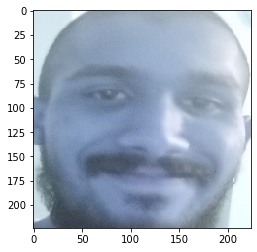

[[0.05055557 0.46878147 0.00112318 0.41968712 0.0568278  0.00302496]]
[1]


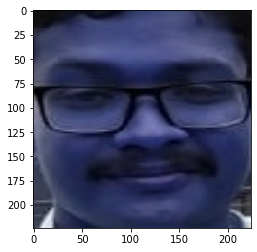

[[3.11788722e-06 1.17142103e-04 8.99865925e-01 1.00003265e-01
  5.99958867e-06 4.50679272e-06]]
[2]


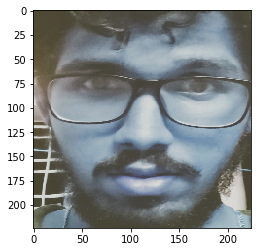

[[7.5416295e-07 7.4384145e-05 9.6302032e-01 3.6662709e-02 2.4158294e-04
  2.4448855e-07]]
[2]


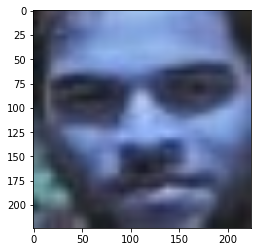

[[0.32082573 0.27712116 0.10212193 0.0051633  0.03383698 0.2609308 ]]
[0]


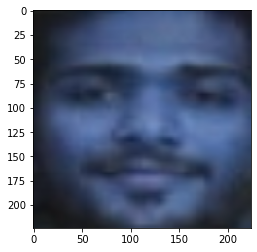

[[0.3767156  0.16241822 0.06612287 0.00634812 0.0443598  0.3440354 ]]
[0]


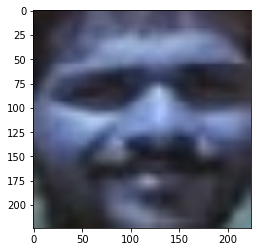

[[0.15307908 0.34220272 0.1555251  0.00309943 0.04875539 0.29733828]]
[1]


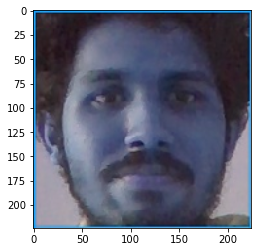

[[2.7487356e-06 1.2824201e-04 5.2386241e-07 2.6030709e-06 9.9986589e-01
  4.2272042e-08]]
[4]


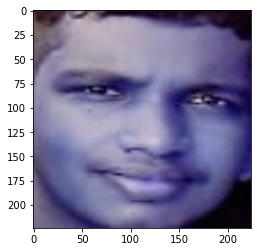

[[0.42559066 0.203136   0.21114153 0.00465932 0.15504389 0.00042859]]
[0]


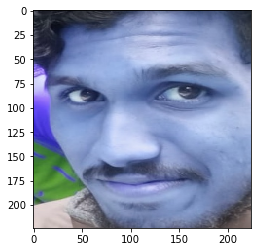

[[6.4629572e-03 6.2330563e-02 4.1500473e-01 2.3157137e-02 4.9297434e-01
  7.0252245e-05]]
[4]


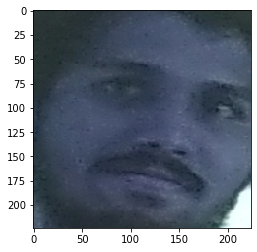

[[0.01281652 0.07222759 0.01731461 0.01030737 0.85791165 0.02942224]]
[4]


In [19]:
for i in os.listdir('/home/aryan/Test/'):
    face=cv2.imread('/home/aryan/Test/'+i)
    '''plt.imshow(face)
    plt.show()
    img=load_img('/home/aryan/Test/'+i,target_size=(224,224))
    img=img_to_array(img)
    img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    img=preprocess_input(img)
    pred=model.predict(img)
    print(pred)
    classes=np.argmax(pred,axis=1)
    print(classes)
    #label= decode_predictions(pred)
    #label = label[0][0]
    # print the classification
    #print('%s (%.2f%%)' % (label[1], label[2]*100))
    print(type(face))'''
    if type(face) is np.ndarray:
        face=cv2.resize(face,(224,224))
        #face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        plt.imshow(face)
        plt.show()
        im=face
        #im=Image.fromarray(face,'RGB')
        img_array=np.array(im)/255
        img_array=np.expand_dims(img_array,axis=0)
        pred=model.predict(img_array)
        print(pred)
        #label = decode_predictions(pred)
        #label = label[0][0]
        # print the classification
        #print('%s (%.2f%%)' % (label[1], label[2]*100))
        classes=np.argmax(pred,axis=1)
        print(classes)

In [18]:
training_set.class_indices

{'Akshay': 0, 'Alvin': 1, 'Amaldeep': 2, 'Arjun': 3, 'Aryan': 4, 'Prapanch': 5}

In [13]:
print(type(face))
print(type(im))
print(type(img_array))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
"""for i in os.listdir('/home/aryan/Test'):
    face=cv2.imread('/home/aryan/Test/'+i)
    print('/home/aryan/Test'+i)
    print(type(face))
    if type(face) is np.ndarray:
        image = cv2.resize(face,(224,224))
        image=np.expand_dims(image,axis=0)
        pred=model.predict(image)
        print(pred)
        label = decode_predictions(pred)
        # retrieve the most likely result, e.g. highest probability
        label = label[0][0]
        # print the classification
        print('%s (%.2f%%)' % (label[1], label[2]*100))
        classes=np.argmax(pred,axis=1)
        print(classes)
"""